## Aim of this class is to get familiar with scaling relations in elliptical galaxies

do **NOT** copy the catalogues (they'll eat up your quota), use them directly via:

In [1]:
szuflada_path = '/home/SZUFLADA/PN/extragalactic_classes/gama_dr4/'
merged_file = szuflada_path + 'merged_cats.csv'

some imports for the class:

In [2]:
import pandas as pd
pd.options.mode.copy_on_write = True

from astropy.io import fits
from astropy.table import Table

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [4]:
import numpy as np

In [5]:
import astropy.units as u

In [6]:
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=.3)

### TASK 1: explore the Faber-Jackson law / fundamental plane based on GAMA galaxies

#### Try to replicate right panel of attached figure (fundamental plane, mag vs Re)

![image](05b_1.png)

Some questions/hints to answer first:
- does GAMA provide luminosity measurements? if not, what can be used as a proxy?
- effective radii are available in SersicPhotometry, though not in kpc ;)

In [ ]:
df = pd.read_csv(merged_file)

df

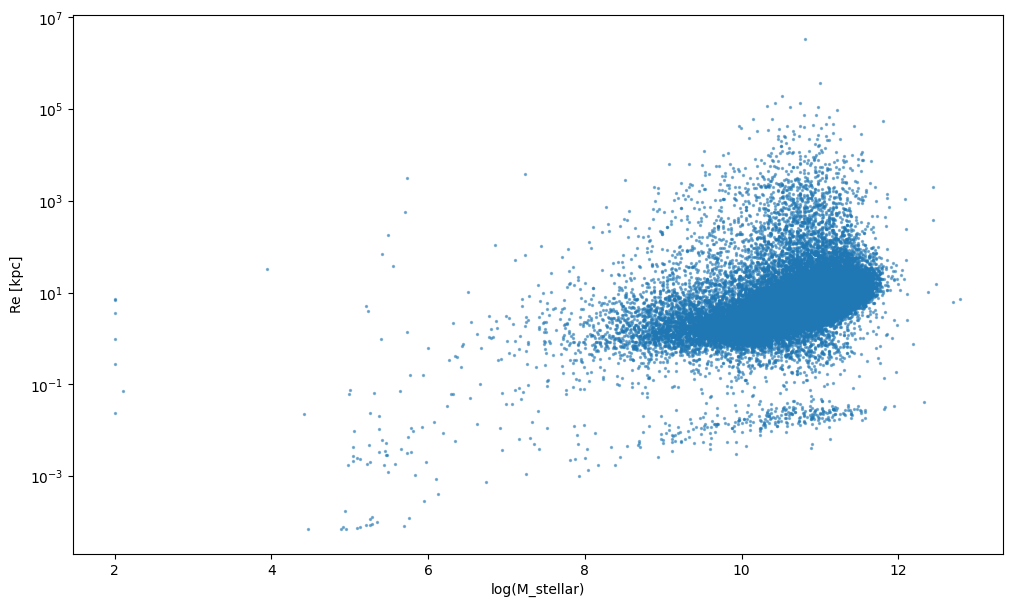

In [ ]:
Z = df['magphys_Z'].values
d_A = cosmo.angular_diameter_distance(Z)
theta_rad = (df['sersic_GALRE_r'].values * u.arcsec).to(u.rad).value
df['rad_kpc'] = d_A.to(u.kpc).value * theta_rad

mass = df['magphys_mass_stellar_percentile50']
rad_kpc = df['rad_kpc'] <= 10

early = df['sersic_GALINDEX_r'] > 2.5

fig, ax = plt.subplots(figsize=(12, 7))
ax.scatter(
    df.loc[early, 'magphys_mass_stellar_percentile50'],
    df.loc[early, 'rad_kpc'],
    s=2,
    alpha=0.5
)

ax.set_xlabel('log(M_stellar)')
ax.set_ylabel('Re [kpc]')
ax.set_yscale('log')
plt.show()

#### Try to replicate the attached figure (Faber-Jackson law, both panels)

![image](05b_2.png)

Some questions/hints to answer first:
- velocity dispersion is available in ``VelocityDispersionsv02.fits`` in SZUFLADA

In [ ]:
from astropy.table import Table

vel_file = '/home/SZUFLADA/PN/extragalactic_classes/gama_dr4/VelocityDispersionsv02.fits'
vel_table = Table.read(vel_file)
print(vel_table.colnames)

['SPECID', 'SURVEY', 'CATAID', 'Z', 'SNR_REST', 'SNR_OBSR', 'CHI2', 'V_STAR', 'VERR_STAR', 'SIG_STAR', 'SIGERR_STAR', 'SIG_STARCORR', 'SIGERR_STARCORR', 'PIPEHASH']


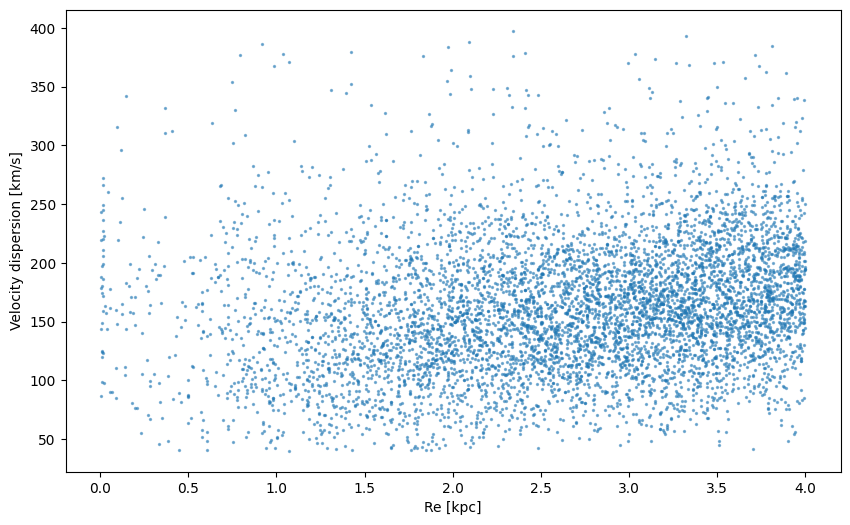

In [67]:
vel_df = vel_table.to_pandas()

merged = df.merge(vel_df, left_on='magphys_CATAID', right_on='CATAID')

early = merged['sersic_GALINDEX_r'] > 4
mask = (merged['rad_kpc'] <= 4) & (merged['SIG_STARCORR'] <= 400) & (merged['SIG_STARCORR']  > 40)

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(
    merged.loc[early & mask, 'rad_kpc'],
    merged.loc[early & mask, 'SIG_STARCORR'],
    s=2,
    alpha=0.5
)

ax.set_xlabel('Re [kpc]')
ax.set_ylabel('Velocity dispersion [km/s]')

plt.show()